# Exploration of FEMA National Flood Insurance Program (NFIP) data

In [1]:
# Python 3
import sys
assert sys.version_info >= (3, 5)

# Common imports
import os
import numpy as np
import pandas as pd
#pd.set_option('float_format', '{:f}'.format)
#pd.options.display.float_format = "{:.2f}".format

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
%matplotlib inline

# from functools import reduce
# import itertools

import seaborn as sns
sns.set(style="ticks", color_codes=True)

import missingno as msno

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('matplotlib version:', matplotlib.__version__)
print('seaborn version:', sns.__version__)
print('missingno version:', msno.__version__)
# print('scikit-learn version:', sklearn.__version__)

numpy version: 1.20.1
pandas version: 1.2.2
matplotlib version: 3.3.4
seaborn version: 0.9.0
missingno version: 0.4.2


# Data

Data obtained from [OpenFEMA Dataset: FIMA NFIP Redacted Claims](https://www.fema.gov/openfema-data-page/fima-nfip-redacted-claims)

For more information on flood insurance and the National Flood Insurance Program (NFIP) see https://www.fema.gov/flood-insurance

In [2]:
# Import data
df_raw = pd.read_csv('/homevol/sroe459/Data/FEMA/FIMA_NFIP_Redacted_Claims-v1.csv')

/homevol/sroe459/miniconda3/envs/sandbox_001/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2495983 entries, 0 to 2495982
Data columns (total 40 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   agricultureStructureIndicator               float64
 1   asOfDate                                    object 
 2   baseFloodElevation                          float64
 3   basementEnclosureCrawlspace                 float64
 4   reportedCity                                object 
 5   condominiumIndicator                        object 
 6   policyCount                                 float64
 7   countyCode                                  float64
 8   communityRatingSystemDiscount               float64
 9   dateOfLoss                                  object 
 10  elevatedBuildingIndicator                   float64
 11  elevationCertificateIndicator               float64
 12  elevationDifference                         float64
 13  censusTract                

In [4]:
# Shape
nRow, nCol = df_raw.shape
nRow = '{:,.0f}'.format(nRow)
print(f'There are {nRow} rows and {nCol} columns')

There are 2,495,983 rows and 40 columns


In [5]:
with pd.option_context('display.max_columns', 100):
    display(df_raw.head(10))

,agricultureStructureIndicator,asOfDate,baseFloodElevation,basementEnclosureCrawlspace,reportedCity,condominiumIndicator,policyCount,countyCode,communityRatingSystemDiscount,dateOfLoss,elevatedBuildingIndicator,elevationCertificateIndicator,elevationDifference,censusTract,floodZone,houseWorship,latitude,longitude,locationOfContents,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,occupancyType,originalConstructionDate,originalNBDate,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,state,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,reportedZipcode,primaryResidence,id
0,0.0,2020-11-01T23:58:45.858Z,NaN,1.0,DETROIT,N,1.0,26163.0,8.0,2014-08-11T04:00:00.000Z,0.0,NaN,NaN,2.616351e+10,B,0.0,42.4,-82.9,2.0,NaN,NaN,3.0,0.0,NaN,1.0,2040-01-01T05:00:00.000Z,2012-07-19T04:00:00.000Z,3507.13,NaN,NaN,0.0,Q,0.0,MI,250000.0,100000.0,2014,48215.0,1.0,5faad46bad3f68081876d038
1,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,TRENTON,N,1.0,34021.0,NaN,1999-09-16T04:00:00.000Z,0.0,NaN,NaN,3.402100e+10,A04,0.0,40.2,-74.8,3.0,NaN,NaN,1.0,0.0,10.0,1.0,1950-07-01T04:00:00.000Z,1984-10-06T04:00:00.000Z,6389.31,NaN,NaN,0.0,1,0.0,NJ,166800.0,5900.0,1999,8638.0,1.0,5faad46bad3f68081876d046
2,0.0,2020-11-01T23:58:45.858Z,NaN,1.0,DETROIT,N,1.0,26163.0,8.0,2016-07-07T04:00:00.000Z,0.0,NaN,NaN,2.616351e+10,B,0.0,42.4,-82.9,2.0,NaN,NaN,3.0,0.0,NaN,1.0,2027-01-01T05:00:00.000Z,2013-01-16T05:00:00.000Z,1638.01,NaN,NaN,0.0,R,0.0,MI,75000.0,30000.0,2016,48215.0,0.0,5faad46bad3f68081876d03f
3,0.0,2020-11-01T23:58:45.858Z,NaN,2.0,DETROIT,N,1.0,26163.0,8.0,2014-08-11T04:00:00.000Z,0.0,NaN,NaN,2.616351e+10,B,0.0,42.4,-82.9,2.0,NaN,NaN,3.0,0.0,NaN,1.0,2022-01-01T05:00:00.000Z,2012-04-24T04:00:00.000Z,3651.57,NaN,NaN,0.0,Q,0.0,MI,250000.0,100000.0,2014,48215.0,1.0,5faad46bad3f68081876d043
4,0.0,2020-11-01T23:58:45.858Z,NaN,2.0,DETROIT,N,1.0,26163.0,8.0,2016-07-08T04:00:00.000Z,0.0,NaN,NaN,2.616351e+10,B,0.0,42.4,-82.9,2.0,NaN,NaN,2.0,0.0,NaN,1.0,2047-01-01T05:00:00.000Z,2012-04-26T04:00:00.000Z,3836.59,NaN,NaN,0.0,R,0.0,MI,150000.0,60000.0,2016,48215.0,1.0,5faad46bad3f68081876d036
5,0.0,2020-11-01T23:58:45.858Z,NaN,2.0,SCRANTON,N,1.0,42069.0,NaN,1985-09-27T04:00:00.000Z,0.0,NaN,NaN,4.206910e+10,A10,0.0,41.4,-75.7,4.0,NaN,NaN,2.0,0.0,10.0,1.0,1950-07-01T04:00:00.000Z,1984-10-05T04:00:00.000Z,3688.00,NaN,NaN,0.0,1,0.0,PA,35000.0,0.0,1985,18508.0,0.0,5faad46bad3f68081876d05b
6,0.0,2020-11-01T23:58:45.858Z,NaN,1.0,DETROIT,N,1.0,26163.0,8.0,2014-08-11T04:00:00.000Z,0.0,NaN,NaN,2.616351e+10,X,0.0,42.4,-82.9,2.0,NaN,NaN,3.0,0.0,NaN,1.0,1997-10-10T04:00:00.000Z,2013-11-08T05:00:00.000Z,8855.33,NaN,NaN,1.0,7,0.0,MI,20000.0,8000.0,2014,48215.0,1.0,5faad46bad3f68081876d05a
7,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,DES ARC,N,1.0,5117.0,NaN,2011-05-02T04:00:00.000Z,1.0,NaN,NaN,5.117460e+09,A,0.0,35.0,-91.5,NaN,NaN,NaN,1.0,0.0,10.0,1.0,1957-09-05T04:00:00.000Z,2007-11-06T05:00:00.000Z,34500.00,NaN,NaN,0.0,1,0.0,AR,34500.0,0.0,2011,72040.0,1.0,5faad46bad3f68081876d03a
8,0.0,2020-11-01T23:58:45.858Z,NaN,2.0,DETROIT,N,1.0,26163.0,8.0,2019-05-01T04:00:00.000Z,0.0,NaN,NaN,2.616351e+10,X,0.0,42.4,-82.9,2.0,NaN,NaN,3.0,0.0,NaN,1.0,2045-01-01T05:00:00.000Z,2013-08-26T04:00:00.000Z,5071.85,1024.87,NaN,0.0,7,0.0,MI,150000.0,60000.0,2019,48215.0,1.0,5faad46bad3f68081876d047
9,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,LA PORTE,N,1.0,48201.0,7.0,2007-08-17T04:00:00.000Z,0.0,NaN,NaN,4.820134e+10,X,0.0,29.7,-95.1,3.0,NaN,NaN,1.0,0.0,NaN,1.0,1958-01-01T05:00:00.000Z,2007-06-24T04:00:00.000Z,17934.47,6574.71,NaN,0.0,7,0.0,TX,100000.0,40000.0,2007,77571.0,1.0,5faad46bad3f68081876d063


In [6]:
with pd.option_context('display.max_columns', 100):
    display(df_raw.tail(10))

,agricultureStructureIndicator,asOfDate,baseFloodElevation,basementEnclosureCrawlspace,reportedCity,condominiumIndicator,policyCount,countyCode,communityRatingSystemDiscount,dateOfLoss,elevatedBuildingIndicator,elevationCertificateIndicator,elevationDifference,censusTract,floodZone,houseWorship,latitude,longitude,locationOfContents,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,occupancyType,originalConstructionDate,originalNBDate,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,state,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,reportedZipcode,primaryResidence,id
2495973,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,VEGA BAJA,N,1.0,72145.0,NaN,2012-11-12T05:00:00.000Z,0.0,1.0,NaN,7.214556e+10,A07,0.0,18.4,-66.4,NaN,NaN,NaN,1.0,0.0,NaN,1.0,1970-01-01T05:00:00.000Z,2002-01-25T05:00:00.000Z,7536.31,NaN,NaN,0.0,1,0.0,PR,62400.0,0.0,2012,693.0,1.0,5faad640ad3f6808189ce5fd
2495974,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,CANOVANAS,N,1.0,72029.0,NaN,2004-09-15T04:00:00.000Z,0.0,1.0,NaN,7.202910e+10,AE,0.0,18.4,-65.9,NaN,NaN,NaN,1.0,0.0,NaN,1.0,1970-01-01T05:00:00.000Z,2002-01-16T05:00:00.000Z,6981.20,NaN,NaN,0.0,1,0.0,PR,78000.0,0.0,2004,729.0,1.0,5faad640ad3f6808189ce5fe
2495975,0.0,2020-11-01T23:58:45.858Z,NaN,2.0,CAMBRIDGE,N,1.0,24019.0,6.0,2003-09-18T04:00:00.000Z,1.0,NaN,NaN,2.401997e+10,AE,0.0,38.6,-76.3,NaN,NaN,NaN,2.0,0.0,50.0,1.0,1958-07-01T04:00:00.000Z,2001-12-14T05:00:00.000Z,6018.95,NaN,NaN,0.0,1,0.0,MD,78000.0,0.0,2003,21613.0,0.0,5faad640ad3f6808189ce603
2495976,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,MIAMI,N,1.0,12086.0,5.0,1999-10-15T04:00:00.000Z,0.0,2.0,NaN,1.208602e+10,AH,0.0,25.7,-80.4,NaN,NaN,NaN,1.0,0.0,10.0,1.0,1992-10-12T04:00:00.000Z,1999-09-08T04:00:00.000Z,5999.49,NaN,NaN,0.0,9,0.0,FL,65400.0,0.0,1999,33183.0,0.0,5faad640ad3f6808189ce60c
2495977,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,RODANTHE,N,1.0,37055.0,7.0,1999-10-16T04:00:00.000Z,0.0,NaN,NaN,3.705597e+10,AE,0.0,35.6,-75.5,NaN,NaN,NaN,1.0,0.0,10.0,1.0,1976-01-01T05:00:00.000Z,1999-10-13T04:00:00.000Z,1811.19,NaN,NaN,0.0,1,0.0,NC,5000.0,0.0,1999,27968.0,1.0,5faad640ad3f6808189ce60e
2495978,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,PHILADELPHIA,N,1.0,42017.0,NaN,1999-09-16T04:00:00.000Z,0.0,2.0,NaN,4.201710e+10,AE,0.0,40.2,-75.1,NaN,NaN,NaN,1.0,0.0,10.0,1.0,1992-10-12T04:00:00.000Z,1999-03-05T05:00:00.000Z,5544.25,NaN,NaN,0.0,9,0.0,PA,30800.0,0.0,1999,18976.0,0.0,5faad640ad3f6808189ce613
2495979,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,LAUDERHILL,N,1.0,12011.0,7.0,1999-05-25T04:00:00.000Z,0.0,2.0,NaN,1.201106e+10,AH,0.0,26.2,-80.2,NaN,NaN,NaN,1.0,0.0,10.0,1.0,1992-10-12T04:00:00.000Z,1999-02-24T05:00:00.000Z,NaN,NaN,NaN,0.0,9,0.0,FL,86100.0,0.0,1999,33313.0,0.0,5faad640ad3f6808189ce618
2495980,0.0,2020-11-01T23:58:45.858Z,NaN,0.0,ORTING,N,1.0,53053.0,2.0,2006-11-06T05:00:00.000Z,0.0,NaN,NaN,5.305307e+10,C,0.0,47.1,-122.1,3.0,NaN,NaN,1.0,0.0,NaN,1.0,1980-07-01T04:00:00.000Z,2001-12-07T05:00:00.000Z,11538.31,1977.23,NaN,0.0,7,0.0,WA,150000.0,60000.0,2006,98360.0,0.0,5faad640ad3f6808189ce629
2495981,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,LAFAYETTE,N,1.0,22055.0,8.0,1993-01-21T05:00:00.000Z,0.0,NaN,NaN,2.205500e+10,B,0.0,30.2,-92.0,3.0,NaN,NaN,1.0,0.0,10.0,1.0,1982-03-30T05:00:00.000Z,1992-09-16T04:00:00.000Z,4972.00,NaN,NaN,1.0,1,0.0,LA,185000.0,60000.0,1993,70503.0,0.0,5faad640ad3f6808189ce634
2495982,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,HOMOSASSA,N,1.0,12017.0,NaN,1993-03-13T05:00:00.000Z,0.0,NaN,NaN,1.201745e+10,A,0.0,28.8,-82.6,4.0,NaN,NaN,2.0,0.0,10.0,1.0,1974-07-01T04:00:00.000Z,1991-07-03T04:00:00.000Z,7699.52,NaN,NaN,0.0,1,0.0,FL,60000.0,0.0,1993,34448.0,0.0,5faad640ad3f6808189ce63b


## Location

In [7]:
# Check missing values in latitude
df_raw['latitude'].isnull().value_counts()

False    2453803
True       42180
Name: latitude, dtype: int64

In [8]:
# Check missing values in latitude
df_raw['longitude'].isnull().value_counts()

False    2453803
True       42180
Name: longitude, dtype: int64

In [9]:
# Remove instances with missing latitude
df = df_raw.dropna(axis=0, subset=['latitude'])

In [10]:
# Shape
nRow, nCol = df.shape
nRow = '{:,.0f}'.format(nRow)
print(f'There are {nRow} rows and {nCol} columns')

There are 2,453,803 rows and 40 columns


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2453803 entries, 0 to 2495982
Data columns (total 40 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   agricultureStructureIndicator               float64
 1   asOfDate                                    object 
 2   baseFloodElevation                          float64
 3   basementEnclosureCrawlspace                 float64
 4   reportedCity                                object 
 5   condominiumIndicator                        object 
 6   policyCount                                 float64
 7   countyCode                                  float64
 8   communityRatingSystemDiscount               float64
 9   dateOfLoss                                  object 
 10  elevatedBuildingIndicator                   float64
 11  elevationCertificateIndicator               float64
 12  elevationDifference                         float64
 13  censusTract                

# Date of Loss

Date on which water first entered the insured building. When time is not specified in the field, it will default to T00:00:00.000Z

In [12]:
# Year of loss
df['dateOfLoss'].value_counts()

2005-08-29T04:00:00.000Z    184472
2012-10-29T04:00:00.000Z    126705
2008-09-13T04:00:00.000Z     43526
2011-08-28T04:00:00.000Z     32345
1995-05-08T04:00:00.000Z     31484
                             ...  
1977-08-05T04:00:00.000Z         1
1977-02-02T05:00:00.000Z         1
2016-11-17T05:00:00.000Z         1
1993-12-24T05:00:00.000Z         1
1988-03-05T05:00:00.000Z         1
Name: dateOfLoss, Length: 15871, dtype: int64

# Select instances for August 29, 2005 event (Hurricane Katrina)

In [13]:
df_Katrina = df[df['dateOfLoss'] == '2005-08-29T04:00:00.000Z']

In [14]:
# Shape
nRow, nCol = df_Katrina.shape
nRow = '{:,.0f}'.format(nRow)
print(f'There are {nRow} rows and {nCol} columns')

There are 184,472 rows and 40 columns


In [15]:
df_Katrina.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184472 entries, 1237 to 2495971
Data columns (total 40 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   agricultureStructureIndicator               184472 non-null  float64
 1   asOfDate                                    184472 non-null  object 
 2   baseFloodElevation                          75692 non-null   float64
 3   basementEnclosureCrawlspace                 14281 non-null   float64
 4   reportedCity                                184466 non-null  object 
 5   condominiumIndicator                        184454 non-null  object 
 6   policyCount                                 184472 non-null  float64
 7   countyCode                                  184330 non-null  float64
 8   communityRatingSystemDiscount               160199 non-null  float64
 9   dateOfLoss                                  184472 non-null  objec

In [16]:
with pd.option_context('display.max_columns', 100):
    display(df_Katrina.head(10))

,agricultureStructureIndicator,asOfDate,baseFloodElevation,basementEnclosureCrawlspace,reportedCity,condominiumIndicator,policyCount,countyCode,communityRatingSystemDiscount,dateOfLoss,elevatedBuildingIndicator,elevationCertificateIndicator,elevationDifference,censusTract,floodZone,houseWorship,latitude,longitude,locationOfContents,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,occupancyType,originalConstructionDate,originalNBDate,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,state,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,reportedZipcode,primaryResidence,id
1237,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,HARAHAN,N,1.0,22051.0,8.0,2005-08-29T04:00:00.000Z,0.0,NaN,NaN,2.205102e+10,X,0.0,30.0,-90.2,3.0,NaN,NaN,1.0,0.0,NaN,4.0,1975-06-01T04:00:00.000Z,1997-08-29T04:00:00.000Z,NaN,NaN,NaN,1.0,1,0.0,LA,200000.0,100000.0,2005,70123.0,0.0,5faad46bad3f68081876d50f
1247,0.0,2020-11-01T23:58:45.858Z,3.0,NaN,KENNER,N,1.0,22051.0,6.0,2005-08-29T04:00:00.000Z,0.0,NaN,0.0,2.205102e+10,AE,0.0,30.0,-90.3,3.0,0.0,3.0,1.0,0.0,NaN,4.0,1997-01-25T05:00:00.000Z,1997-07-25T04:00:00.000Z,96629.92,75000.00,NaN,1.0,1,0.0,LA,163400.0,220500.0,2005,70062.0,0.0,5faad46bad3f68081876d507
1414,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,SLIDELL,N,1.0,22103.0,7.0,2005-08-29T04:00:00.000Z,0.0,NaN,NaN,2.210304e+10,C,0.0,30.3,-89.8,3.0,NaN,NaN,1.0,0.0,NaN,1.0,1974-12-30T05:00:00.000Z,1997-07-25T04:00:00.000Z,117000.00,38600.00,NaN,0.0,1,0.0,LA,117000.0,38600.0,2005,70458.0,0.0,5faad46bad3f68081876d5cd
2270,0.0,2020-11-01T23:58:45.858Z,NaN,0.0,NEW ORLEANS,N,1.0,22071.0,8.0,2005-08-29T04:00:00.000Z,0.0,NaN,NaN,2.207101e+10,X,0.0,30.0,-90.1,5.0,NaN,NaN,2.0,0.0,NaN,2.0,2040-01-01T05:00:00.000Z,1997-09-01T04:00:00.000Z,105036.03,10927.64,NaN,0.0,7,0.0,LA,250000.0,100000.0,2005,70118.0,1.0,5faad46cad3f68081876d917
2295,0.0,2020-11-01T23:58:45.858Z,NaN,0.0,NEW ORLEANS,N,1.0,22071.0,8.0,2005-08-29T04:00:00.000Z,0.0,NaN,NaN,2.207100e+10,X,0.0,30.0,-90.1,3.0,NaN,NaN,1.0,0.0,NaN,2.0,1950-01-01T05:00:00.000Z,1997-09-01T04:00:00.000Z,11432.97,NaN,NaN,0.0,7,0.0,LA,100000.0,40000.0,2005,70122.0,0.0,5faad46cad3f68081876d935
4471,0.0,2020-11-01T23:58:45.858Z,4.0,NaN,NEW ORLEANS,N,1.0,22071.0,8.0,2005-08-29T04:00:00.000Z,0.0,3.0,0.0,2.207100e+10,A04,0.0,30.0,-90.0,3.0,3.5,3.0,1.0,0.0,NaN,6.0,1984-06-01T04:00:00.000Z,2003-04-25T04:00:00.000Z,440000.00,NaN,NaN,1.0,1,0.0,LA,440000.0,0.0,2005,70127.0,0.0,5faad46cad3f68081876e1c1
5593,0.0,2020-11-01T23:58:45.858Z,1.0,NaN,NEW ORLEANS,N,1.0,22071.0,8.0,2005-08-29T04:00:00.000Z,0.0,NaN,0.0,2.207100e+10,AOB,0.0,30.1,-90.0,3.0,0.0,1.0,1.0,0.0,NaN,1.0,1976-01-01T05:00:00.000Z,2001-05-02T04:00:00.000Z,NaN,0.00,NaN,1.0,1,0.0,LA,140000.0,10000.0,2005,70128.0,1.0,5faad46cad3f68081876e634
18819,0.0,2020-11-01T23:58:45.858Z,8.0,NaN,GULF SHORES,N,1.0,1003.0,8.0,2005-08-29T04:00:00.000Z,1.0,3.0,6.0,1.003011e+09,A08,0.0,30.2,-87.8,3.0,0.0,13.0,1.0,0.0,10.0,1.0,1978-07-01T04:00:00.000Z,1995-07-21T04:00:00.000Z,5031.07,301.22,NaN,1.0,1,0.0,AL,115000.0,22100.0,2005,36542.0,0.0,5faad46ead3f6808187719af
21393,0.0,2020-11-01T23:58:45.858Z,3.0,NaN,KENNER,N,1.0,22051.0,6.0,2005-08-29T04:00:00.000Z,0.0,3.0,0.0,2.205102e+10,AE,0.0,30.0,-90.2,NaN,0.0,3.0,1.0,0.0,10.0,4.0,1985-07-01T04:00:00.000Z,1996-09-24T04:00:00.000Z,7740.94,NaN,NaN,1.0,1,0.0,LA,500000.0,0.0,2005,70065.0,0.0,5faad46ead3f6808187723f2
21410,0.0,2020-11-01T23:58:45.858Z,3.0,NaN,KENNER,N,1.0,22051.0,6.0,2005-08-29T04:00:00.000Z,0.0,3.0,0.0,2.205102e+10,A02,0.0,30.0,-90.2,NaN,0.0,3.0,1.0,0.0,10.0,4.0,1985-07-01T04:00:00.000Z,1996-09-24T04:00:00.000Z,19993.31,NaN,NaN,1.0,1,0.0,LA,500000.0,0.0,2005,70065.0,0.0,5faad46ead3f6808187723fc


In [17]:
with pd.option_context('display.max_columns', 100):
    display(df_Katrina.tail(10))

,agricultureStructureIndicator,asOfDate,baseFloodElevation,basementEnclosureCrawlspace,reportedCity,condominiumIndicator,policyCount,countyCode,communityRatingSystemDiscount,dateOfLoss,elevatedBuildingIndicator,elevationCertificateIndicator,elevationDifference,censusTract,floodZone,houseWorship,latitude,longitude,locationOfContents,lowestAdjacentGrade,lowestFloorElevation,numberOfFloorsInTheInsuredBuilding,nonProfitIndicator,obstructionType,occupancyType,originalConstructionDate,originalNBDate,amountPaidOnBuildingClaim,amountPaidOnContentsClaim,amountPaidOnIncreasedCostOfComplianceClaim,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,state,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,reportedZipcode,primaryResidence,id
2430475,0.0,2020-10-27T17:56:33.967Z,NaN,NaN,NEW ORLEANS,N,1.0,22071.0,8.0,2005-08-29T04:00:00.000Z,0.0,1.0,NaN,2.207101e+10,V16,0.0,30.0,-90.1,4.0,NaN,NaN,3.0,0.0,NaN,1.0,1965-01-01T05:00:00.000Z,2005-08-01T04:00:00.000Z,NaN,NaN,NaN,0.0,1,0.0,LA,138900.0,30700.0,2005,70124.0,1.0,5faad631ad3f6808189be397
2430633,0.0,2020-11-01T23:58:45.858Z,13.0,NaN,COVINGTON,N,1.0,22103.0,8.0,2005-08-29T04:00:00.000Z,1.0,3.0,4.0,2.210304e+10,AE,0.0,30.4,-90.1,4.0,5.0,17.0,2.0,0.0,10.0,1.0,1979-01-01T05:00:00.000Z,2004-09-23T04:00:00.000Z,4140.64,NaN,NaN,0.0,1,0.0,LA,250000.0,27600.0,2005,70433.0,1.0,5faad631ad3f6808189be0a8
2430948,0.0,2020-10-27T17:56:33.967Z,NaN,NaN,NEW ORLEANS,N,1.0,22071.0,8.0,2005-08-29T04:00:00.000Z,0.0,1.0,NaN,2.207101e+10,V16,0.0,30.0,-90.1,4.0,NaN,NaN,3.0,0.0,NaN,1.0,1965-01-01T05:00:00.000Z,2005-08-01T04:00:00.000Z,NaN,NaN,NaN,0.0,1,0.0,LA,138900.0,30700.0,2005,70124.0,1.0,5faad631ad3f6808189be396
2431074,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,NEW ORLEANS,N,1.0,22071.0,8.0,2005-08-29T04:00:00.000Z,0.0,1.0,NaN,2.207101e+10,V16,0.0,30.0,-90.1,4.0,NaN,NaN,3.0,0.0,NaN,1.0,1965-01-01T05:00:00.000Z,2005-08-01T04:00:00.000Z,145000.00,32000.0,15000.0,0.0,1,0.0,LA,145000.0,32000.0,2005,70124.0,1.0,5faad631ad3f6808189be8ad
2495450,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,NEW ORLEANS,N,1.0,22071.0,8.0,2005-08-29T04:00:00.000Z,0.0,NaN,NaN,2.207100e+10,AE,0.0,30.0,-90.1,3.0,NaN,NaN,1.0,0.0,NaN,1.0,2047-06-01T04:00:00.000Z,1999-10-19T04:00:00.000Z,40000.00,NaN,NaN,0.0,1,0.0,LA,40000.0,0.0,2005,70117.0,1.0,5faad640ad3f6808189ce455
2495650,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,NEW ORLEANS,N,1.0,22071.0,8.0,2005-08-29T04:00:00.000Z,0.0,NaN,NaN,2.207100e+10,A07,0.0,30.0,-90.0,3.0,NaN,NaN,1.0,0.0,NaN,1.0,1956-07-01T04:00:00.000Z,2001-07-24T04:00:00.000Z,91300.00,21000.0,11040.0,0.0,1,0.0,LA,91300.0,21000.0,2005,70126.0,1.0,5faad640ad3f6808189ce564
2495674,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,NEW ORLEANS,N,1.0,22071.0,8.0,2005-08-29T04:00:00.000Z,0.0,NaN,NaN,2.207100e+10,A02,0.0,30.0,-90.1,NaN,NaN,NaN,1.0,0.0,NaN,1.0,2040-07-01T04:00:00.000Z,2001-06-09T04:00:00.000Z,14500.00,NaN,NaN,0.0,1,0.0,LA,14600.0,0.0,2005,70122.0,1.0,5faad640ad3f6808189ce55f
2495814,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,KENNER,N,1.0,22051.0,7.0,2005-08-29T04:00:00.000Z,0.0,NaN,NaN,2.205102e+10,AE,0.0,30.0,-90.2,3.0,NaN,NaN,1.0,0.0,NaN,1.0,1959-01-11T05:00:00.000Z,2000-02-25T05:00:00.000Z,50000.00,10000.0,30000.0,0.0,1,0.0,LA,50000.0,10000.0,2005,70065.0,1.0,5faad640ad3f6808189ce594
2495846,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,JEFFERSON,N,1.0,22051.0,5.0,2005-08-29T04:00:00.000Z,0.0,NaN,NaN,2.205102e+10,AE,0.0,30.0,-90.2,3.0,NaN,NaN,1.0,0.0,NaN,1.0,2049-01-01T05:00:00.000Z,1999-06-05T04:00:00.000Z,NaN,NaN,NaN,0.0,1,0.0,LA,100000.0,15700.0,2005,70121.0,1.0,5faad640ad3f6808189ce593
2495971,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,SLIDELL,N,1.0,22103.0,9.0,2005-08-29T04:00:00.000Z,1.0,NaN,NaN,2.210304e+10,AE,0.0,30.3,-89.8,NaN,NaN,NaN,1.0,0.0,15.0,1.0,1974-01-01T05:00:00.000Z,2002-01-30T05:00:00.000Z,15381.76,NaN,NaN,0.0,1,0.0,LA,40000.0,0.0,2005,70460.0,1.0,5faad640ad3f6808189ce638


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

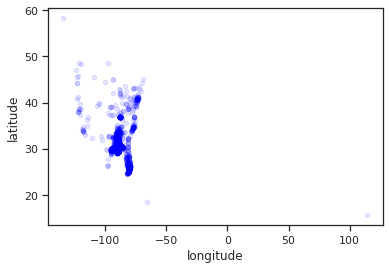

In [18]:
# Plot the instances
df_Katrina.plot(kind="scatter", x="longitude", y="latitude", color='blue', alpha=0.1)

Outliers?

In [19]:
df_Katrina['longitude'].describe()

count    184472.000000
mean        -89.860963
std           1.101750
min        -134.600000
25%         -90.100000
50%         -90.100000
75%         -89.900000
max         114.400000
Name: longitude, dtype: float64

In [20]:
#Explore single instance with Long = 114.4
df_Katrina[df_Katrina['longitude'] == 114.4]

,agricultureStructureIndicator,asOfDate,baseFloodElevation,basementEnclosureCrawlspace,reportedCity,condominiumIndicator,policyCount,countyCode,communityRatingSystemDiscount,dateOfLoss,...,postFIRMConstructionIndicator,rateMethod,smallBusinessIndicatorBuilding,state,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,reportedZipcode,primaryResidence,id
885249,0.0,2020-11-01T23:58:45.858Z,1.0,0.0,NEW ORLEANS,N,1.0,NaN,8.0,2005-08-29T04:00:00.000Z,...,0.0,1,0.0,LA,25000.0,0.0,2005,70116.0,0.0,5faad4f0ad3f6808188452ea


In [21]:
#Drop single instance with Long = 114.4
df_Katrina = df_Katrina[df_Katrina['longitude'] != 114.4]

In [22]:
df_Katrina['longitude'].describe()

count    184471.000000
mean        -89.862070
std           0.993823
min        -134.600000
25%         -90.100000
50%         -90.100000
75%         -89.900000
max         -66.000000
Name: longitude, dtype: float64

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

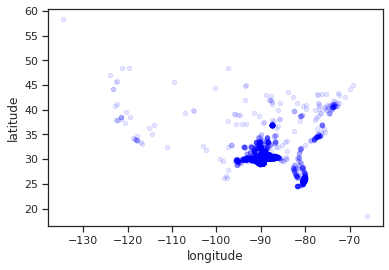

In [23]:
# Plot the instances
df_Katrina.plot(kind="scatter", x="longitude", y="latitude", color='blue', alpha=0.1)

In [24]:
df_Katrina['latitude'].describe()

count    184471.000000
mean         30.039638
std           0.506300
min          18.400000
25%          30.000000
50%          30.000000
75%          30.000000
max          58.400000
Name: latitude, dtype: float64

In [25]:
# Zip code
# 5-digit Postal Zip Code of the insured property
df_Katrina['reportedZipcode'].value_counts(dropna=False)

70065.0    9466
70122.0    8834
70043.0    7495
70003.0    7378
70126.0    7377
           ... 
77060.0       1
38748.0       1
48604.0       1
39038.0       1
25827.0       1
Name: reportedZipcode, Length: 971, dtype: int64

### Reported City
This is the city of the insured property as reported to us by our Write Your Own (WYO) partners

In [26]:
# City
df_Katrina['reportedCity'].value_counts(dropna=False)

NEW ORLEANS        65170
METAIRIE           24597
SLIDELL            12382
KENNER             11052
CHALMETTE           7494
                   ...  
BAYOU LA BARTE         1
ALLIGATOR POINT        1
TCHULA                 1
SAINT JOSEPH           1
CHALMETTS              1
Name: reportedCity, Length: 1033, dtype: int64

In [27]:
# See if there is instances with missing information about city
df_Katrina['reportedCity'].isnull().value_counts()

False    184465
True          6
Name: reportedCity, dtype: int64

In [28]:
# Remove instances with missing information about city
df_Katrina.dropna(axis=0, subset=['reportedCity'], inplace=True)

<ipython-input-28-82a7e8577645>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Katrina.dropna(axis=0, subset=['reportedCity'], inplace=True)


In [29]:
df_Katrina['reportedCity'].isnull().value_counts()

False    184465
Name: reportedCity, dtype: int64

### County Code 

FIPS code uniquely identifying the primary County (e.g., 011 represents Broward County) associated with the project. Note, the County Code field may not reflect the individual county the property is located as projects can be associated with more than one county

In [30]:
# County
df_Katrina['countyCode'].value_counts(dropna=False)

22071.0    65111
22051.0    57038
22103.0    16174
22087.0    14668
28047.0     7270
           ...  
48135.0        1
28027.0        1
9005.0         1
48061.0        1
39035.0        1
Name: countyCode, Length: 290, dtype: int64

### Census Tract
US Census Bureau defined census Tracts; statistical subdivisions of a county or equivalent entity that are updated prior to each decennial census. The NFIP relies on our geocoding service to assign census tract code. 11-digit code defining census tract

In [31]:
# Census tract
df_Katrina['censusTract'].value_counts()

2.804503e+10    2190
2.210304e+10    2181
2.205102e+10    1843
2.207100e+10    1636
2.804700e+10    1582
                ... 
4.820155e+10       1
2.807302e+10       1
4.212577e+10       1
6.047002e+09       1
1.201101e+10       1
Name: censusTract, Length: 1705, dtype: int64

In [32]:
df_Katrina.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184465 entries, 1237 to 2495971
Data columns (total 40 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   agricultureStructureIndicator               184465 non-null  float64
 1   asOfDate                                    184465 non-null  object 
 2   baseFloodElevation                          75688 non-null   float64
 3   basementEnclosureCrawlspace                 14280 non-null   float64
 4   reportedCity                                184465 non-null  object 
 5   condominiumIndicator                        184447 non-null  object 
 6   policyCount                                 184465 non-null  float64
 7   countyCode                                  184324 non-null  float64
 8   communityRatingSystemDiscount               160194 non-null  float64
 9   dateOfLoss                                  184465 non-null  objec

<AxesSubplot:>

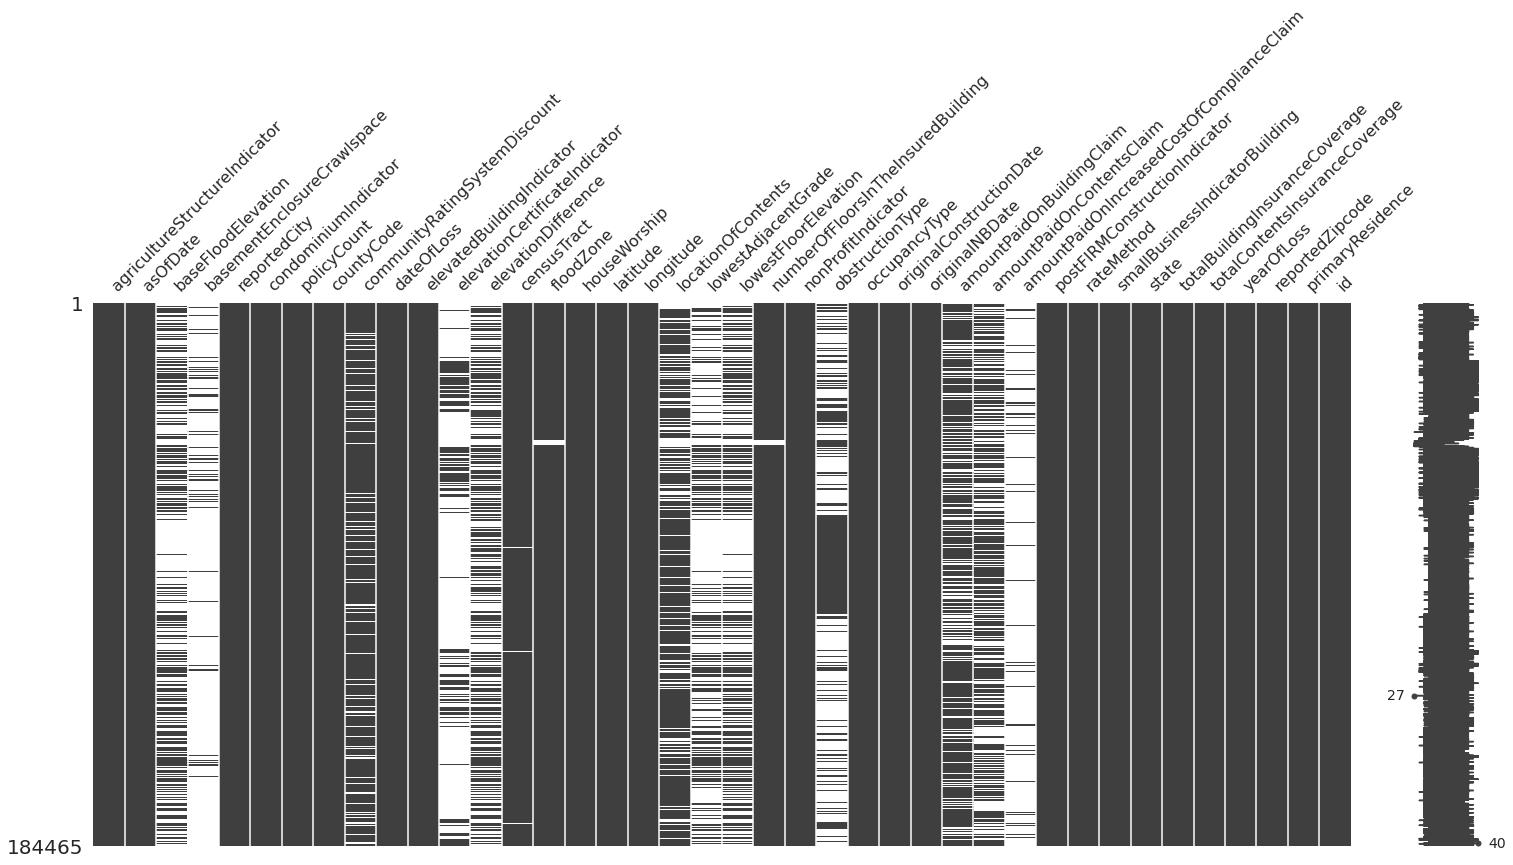

In [33]:
# Check missing values 
msno.matrix(df_Katrina)

## Explore attributes

More info at https://www.fema.gov/openfema-data-page/fima-nfip-redacted-claims

### Amount Paid On Building Claim
Dollar amount paid on the building claim. In some instances, a negative amount may appear which occurs when a check issued to a policy holder isn't cashed and has to be re-issued.

In [34]:
# Building Claim
df_Katrina['amountPaidOnBuildingClaim']

1237             NaN
1247        96629.92
1414       117000.00
2270       105036.03
2295        11432.97
             ...    
2495650     91300.00
2495674     14500.00
2495814     50000.00
2495846          NaN
2495971     15381.76
Name: amountPaidOnBuildingClaim, Length: 184465, dtype: float64

In [35]:
# Building Claim
df_Katrina['amountPaidOnBuildingClaim'].isnull().value_counts(dropna=False)

False    136561
True      47904
Name: amountPaidOnBuildingClaim, dtype: int64

In [36]:
# Remove instances with missing information on Building Claim
df_Katrina = df_Katrina.dropna(axis=0, subset=['amountPaidOnBuildingClaim'])

In [37]:
# Shape
nRow, nCol = df_Katrina.shape
nRow = '{:,.0f}'.format(nRow)
print(f'There are {nRow} rows and {nCol} columns')

There are 136,561 rows and 40 columns


In [38]:
df_Katrina['amountPaidOnBuildingClaim'].isnull().value_counts()

False    136561
Name: amountPaidOnBuildingClaim, dtype: int64

In [39]:
# See range of Building Claims
df_Katrina['amountPaidOnBuildingClaim'].describe().round(2)

count      136561.00
mean        85306.82
std         81015.28
min             0.00
25%         40000.00
50%         72736.81
75%        110000.00
max      10000000.00
Name: amountPaidOnBuildingClaim, dtype: float64

In [40]:
# How many instances with Building Claim = 0 
len(df_Katrina[df_Katrina['amountPaidOnBuildingClaim'] == 0])

218

<AxesSubplot:>

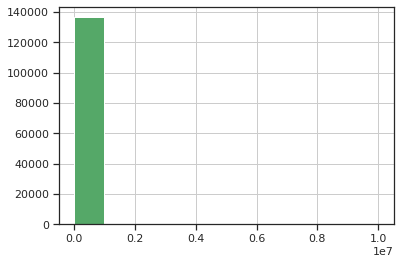

In [41]:
# Visualise distribution of Building Claims
df_Katrina['amountPaidOnBuildingClaim'].hist(facecolor='g')

<AxesSubplot:>

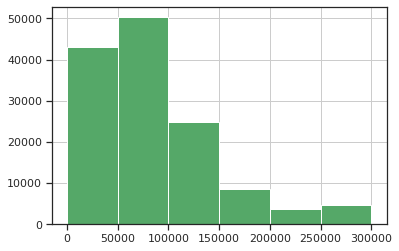

In [42]:
# Visualise distribution of Building Claims up to US$300,000
df_Katrina['amountPaidOnBuildingClaim'].hist(bins=[0, 50000, 100000, 150000, 200000, 250000, 300000], facecolor='g')

<AxesSubplot:>

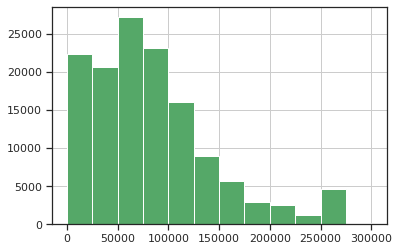

In [43]:
# Visualise distribution of Building Claims up to US$300,000
df_Katrina['amountPaidOnBuildingClaim'].hist(bins=[0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000, 250000, 275000, 300000], facecolor='g')

<AxesSubplot:>

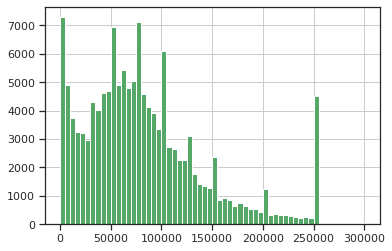

In [44]:
# Visualise distribution of Building Claims up to US$300,000
df_Katrina['amountPaidOnBuildingClaim'].hist(bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000, 100000, 105000, 110000, 115000, 120000, 125000, 130000, 135000, 140000, 145000, 150000, 155000, 160000, 165000, 170000, 175000, 180000, 185000, 190000, 195000, 200000, 205000, 210000, 215000, 220000, 225000, 230000, 235000, 240000, 245000, 250000, 255000, 260000, 265000, 270000, 275000, 280000, 285000, 290000, 295000, 300000], facecolor='g')

It seems that:
- some instances are aggregated at USD50,000, USD100,000, USD125,000, ...
- there is a cap at USD250,000

In [45]:
# How many instances with Building Claim = US$250,000 
len(df_Katrina[df_Katrina['amountPaidOnBuildingClaim'] == 250000])

4487

In [46]:
per_instances_at_250000 = len(df_Katrina[df_Katrina['amountPaidOnBuildingClaim'] == 250000])/len(df_Katrina)*100
per_instances_at_250000 = '{:,.2f}'.format(per_instances_at_250000)
print(f'There is {per_instances_at_250000}% of instances at US$250,000')

There is 3.29% of instances at US$250,000


### Total Building Insurance Coverage

Total Insurance Amount in dollars on the Building

In [47]:
# Building insurance coverage
df_Katrina['totalBuildingInsuranceCoverage'].value_counts(dropna=False)

250000.0    13493
100000.0     5602
75000.0      4222
150000.0     3351
50000.0      3248
            ...  
268300.0        1
303000.0        1
277300.0        1
594900.0        1
240700.0        1
Name: totalBuildingInsuranceCoverage, Length: 3175, dtype: int64

<AxesSubplot:>

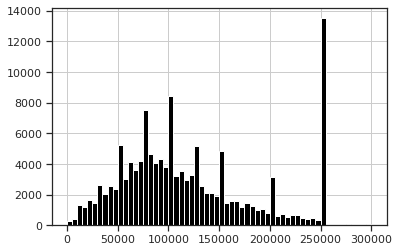

In [48]:
# Visualise distribution of insurance coverage up to US$300,000
df_Katrina['totalBuildingInsuranceCoverage'].hist(bins=[0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000, 75000, 80000, 85000, 90000, 95000, 100000, 105000, 110000, 115000, 120000, 125000, 130000, 135000, 140000, 145000, 150000, 155000, 160000, 165000, 170000, 175000, 180000, 185000, 190000, 195000, 200000, 205000, 210000, 215000, 220000, 225000, 230000, 235000, 240000, 245000, 250000, 255000, 260000, 265000, 270000, 275000, 280000, 285000, 290000, 295000, 300000], facecolor='black')

### Building claim and building insurance

In [49]:
# Amount paid and insurance coverage
df_Katrina[['amountPaidOnBuildingClaim', 'totalBuildingInsuranceCoverage']]

,amountPaidOnBuildingClaim,totalBuildingInsuranceCoverage
1247,96629.92,163400.0
1414,117000.00,117000.0
2270,105036.03,250000.0
2295,11432.97,100000.0
4471,440000.00,440000.0
...,...,...
2495450,40000.00,40000.0
2495650,91300.00,91300.0
2495674,14500.00,14600.0
2495814,50000.00,50000.0


In [50]:
# Define a function that compares amountPaidOnBuildingClaim and totalBuildingInsuranceCoverage
def money_paid (row):
    if row['amountPaidOnBuildingClaim'] == row['totalBuildingInsuranceCoverage']:
        return 'True'
    return 'False'

In [51]:
# Create column Overcap
df_Katrina['PaidEqualsInsuranceCoverage'] = df_Katrina.apply (lambda row: money_paid(row), axis=1)

In [52]:
# Amount paid and insurance coverage
df_Katrina[['amountPaidOnBuildingClaim', 'totalBuildingInsuranceCoverage', 'PaidEqualsInsuranceCoverage']]

,amountPaidOnBuildingClaim,totalBuildingInsuranceCoverage,PaidEqualsInsuranceCoverage
1247,96629.92,163400.0,False
1414,117000.00,117000.0,True
2270,105036.03,250000.0,False
2295,11432.97,100000.0,False
4471,440000.00,440000.0,True
...,...,...,...
2495450,40000.00,40000.0,True
2495650,91300.00,91300.0,True
2495674,14500.00,14600.0,False
2495814,50000.00,50000.0,True


In [53]:
df_Katrina['PaidEqualsInsuranceCoverage'].value_counts(dropna=False)

True     74306
False    62255
Name: PaidEqualsInsuranceCoverage, dtype: int64

So did some buildings have multiple claims that led to the total building insurance coverage?

Is there a way to identify each building?

In [54]:
df_Katrina['longitude']

1247      -90.3
1414      -89.8
2270      -90.1
2295      -90.1
4471      -90.0
           ... 
2495450   -90.1
2495650   -90.0
2495674   -90.1
2495814   -90.2
2495971   -89.8
Name: longitude, Length: 136561, dtype: float64

In [55]:
df_Katrina['latitude']

1247       30.0
1414       30.3
2270       30.0
2295       30.0
4471       30.0
           ... 
2495450    30.0
2495650    30.0
2495674    30.0
2495814    30.0
2495971    30.3
Name: latitude, Length: 136561, dtype: float64

Latitude and Longitude are not detailed enought to get a unique identifier enabling to find the house.

### Amount Paid On Increased Cost Of Compliance Claim

Dollar amount paid on the Increased Cost of Compliance (ICC) claim. Increased Cost of Compliance (ICC) coverage is one of several flood insurances resources for policyholders who need additional help rebuilding after a flood. It provides up to $30,000 to help cover the cost of mitigation measures that will reduce the flood risk

In [56]:
df_Katrina['amountPaidOnIncreasedCostOfComplianceClaim'].value_counts(dropna=False)

NaN         125521
30000.00      4608
15000.00       267
6300.00         35
8500.00         33
             ...  
13545.00         1
17608.72         1
18992.50         1
10226.00         1
14999.99         1
Name: amountPaidOnIncreasedCostOfComplianceClaim, Length: 3849, dtype: int64

In [57]:
df_Katrina['amountPaidOnIncreasedCostOfComplianceClaim'].describe().round(2)

count    11040.00
mean     20100.33
std       9940.29
min          0.00
25%      10324.25
50%      21387.94
75%      30000.00
max      45000.00
Name: amountPaidOnIncreasedCostOfComplianceClaim, dtype: float64

### Non Profit Indicator

Yes (Y) or No (N) indicator of whether or not a building is reported as being a non-profit in the policy application.
- Yes is indicated with either a 'true' or '1'.
- No is indicated with either a 'false' or '0'

In [58]:
df_Katrina['nonProfitIndicator'].value_counts(dropna=False)

0.0    136549
1.0        12
Name: nonProfitIndicator, dtype: int64

In [59]:
# Explore profit buildings
df_Katrina[df_Katrina['nonProfitIndicator'] == 1]

,agricultureStructureIndicator,asOfDate,baseFloodElevation,basementEnclosureCrawlspace,reportedCity,condominiumIndicator,policyCount,countyCode,communityRatingSystemDiscount,dateOfLoss,...,rateMethod,smallBusinessIndicatorBuilding,state,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,reportedZipcode,primaryResidence,id,PaidEqualsInsuranceCoverage
147663,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,NEW ORLEANS,N,1.0,22071.0,8.0,2005-08-29T04:00:00.000Z,...,1,0.0,LA,500000.0,500000.0,2005,70112.0,0.0,5faad480ad3f680818791106,False
147697,0.0,2020-11-01T23:58:45.858Z,100.0,NaN,NEW ORLEANS,N,1.0,22071.0,8.0,2005-08-29T04:00:00.000Z,...,1,0.0,LA,500000.0,500000.0,2005,70112.0,0.0,5faad480ad3f680818791109,True
147698,0.0,2020-11-01T23:58:45.858Z,NaN,1.0,NEW ORLEANS,N,1.0,22071.0,8.0,2005-08-29T04:00:00.000Z,...,1,0.0,LA,500000.0,500000.0,2005,70112.0,0.0,5faad480ad3f68081879110d,True
150348,0.0,2020-11-01T23:58:45.858Z,NaN,2.0,NEW ORLEANS,N,1.0,22071.0,8.0,2005-08-29T04:00:00.000Z,...,1,0.0,LA,500000.0,500000.0,2005,70112.0,0.0,5faad480ad3f680818791b7e,True
183843,0.0,2020-11-01T23:58:45.858Z,1.0,NaN,NEW ORLEANS,N,1.0,22071.0,8.0,2005-08-29T04:00:00.000Z,...,1,0.0,LA,400000.0,100000.0,2005,70118.0,0.0,5faad485ad3f680818799e8a,True
183887,0.0,2020-11-01T23:58:45.858Z,1.0,NaN,NEW ORLEANS,N,1.0,22071.0,8.0,2005-08-29T04:00:00.000Z,...,1,0.0,LA,250000.0,150000.0,2005,70118.0,0.0,5faad485ad3f680818799eb1,False
488765,0.0,2020-11-01T23:58:45.858Z,-4.0,NaN,NEW ORLEANS,N,1.0,22071.0,8.0,2005-08-29T04:00:00.000Z,...,1,0.0,LA,48400.0,38600.0,2005,70127.0,1.0,5faad4b0ad3f6808187e456b,True
489588,0.0,2020-11-01T23:58:45.858Z,NaN,0.0,SLIDELL,N,1.0,22103.0,9.0,2005-08-29T04:00:00.000Z,...,1,0.0,LA,355400.0,57900.0,2005,70458.0,0.0,5faad4b0ad3f6808187e48df,True
899163,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,SLIDELL,N,1.0,22103.0,7.0,2005-08-29T04:00:00.000Z,...,7,0.0,LA,125000.0,50000.0,2005,70460.0,0.0,5faad4f3ad3f6808188488dc,False
2061529,0.0,2020-11-01T23:58:45.858Z,11.0,NaN,BILOXI,N,1.0,28047.0,5.0,2005-08-29T04:00:00.000Z,...,1,0.0,MS,450000.0,100000.0,2005,39530.0,0.0,5faad5dbad3f68081896440c,False


### Small Business Indicator Building

Yes (Y) or No (N) indicator of whether or not the insured represents a small business.
 - Yes is indicated with either a 'true' or '1'.
 - No is indicated with either a 'false' or '0'. 

Small business is defined as a business with fewer than 100 employees in the policy application

In [60]:
# Small Business Indicator Building
df_Katrina['smallBusinessIndicatorBuilding'].value_counts(dropna=False)

0.0    136506
1.0        55
Name: smallBusinessIndicatorBuilding, dtype: int64

In [61]:
# Explore profit buildings
df_Katrina[df_Katrina['smallBusinessIndicatorBuilding'] == 1]

,agricultureStructureIndicator,asOfDate,baseFloodElevation,basementEnclosureCrawlspace,reportedCity,condominiumIndicator,policyCount,countyCode,communityRatingSystemDiscount,dateOfLoss,...,rateMethod,smallBusinessIndicatorBuilding,state,totalBuildingInsuranceCoverage,totalContentsInsuranceCoverage,yearOfLoss,reportedZipcode,primaryResidence,id,PaidEqualsInsuranceCoverage
27886,0.0,2020-11-01T23:58:45.858Z,10.0,0.0,PASS CHRISTIAN,N,1.0,28047.0,8.0,2005-08-29T04:00:00.000Z,...,1,1.0,MS,500000.0,275600.0,2005,39571.0,0.0,5faad46fad3f680818773d2b,True
30641,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,BAYOU LA BATRE,N,1.0,1097.0,NaN,2005-08-29T04:00:00.000Z,...,1,1.0,AL,60000.0,0.0,2005,36509.0,0.0,5faad470ad3f6808187747f8,True
48055,0.0,2020-11-01T23:58:45.858Z,2.0,NaN,NEW ORLEANS,N,1.0,22071.0,8.0,2005-08-29T04:00:00.000Z,...,1,1.0,LA,500000.0,500000.0,2005,70129.0,0.0,5faad472ad3f680818778ca2,False
48278,0.0,2020-11-01T23:58:45.858Z,0.0,NaN,NEW ORLEANS,N,1.0,22071.0,8.0,2005-08-29T04:00:00.000Z,...,1,1.0,LA,50000.0,10000.0,2005,70118.0,0.0,5faad472ad3f680818778b68,True
123696,0.0,2020-11-01T23:58:45.858Z,9.0,NaN,SLIDELL,N,1.0,22103.0,9.0,2005-08-29T04:00:00.000Z,...,1,1.0,LA,500000.0,285000.0,2005,70458.0,0.0,5faad47dad3f68081878af89,True
151143,0.0,2020-11-01T23:58:45.858Z,NaN,0.0,MOSS POINT,N,1.0,28059.0,NaN,2005-08-29T04:00:00.000Z,...,1,1.0,MS,500000.0,243100.0,2005,39563.0,0.0,5faad481ad3f680818791e9c,True
151149,0.0,2020-11-01T23:58:45.858Z,NaN,0.0,MOSS POINT,N,1.0,28059.0,NaN,2005-08-29T04:00:00.000Z,...,1,1.0,MS,500000.0,243100.0,2005,39563.0,0.0,5faad481ad3f680818791e9b,False
162412,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,GAUTIER,N,1.0,28059.0,8.0,2005-08-29T04:00:00.000Z,...,1,1.0,MS,73300.0,30500.0,2005,39553.0,0.0,5faad482ad3f680818794b5e,True
163682,0.0,2020-11-01T23:58:45.858Z,NaN,NaN,MOSS POINT,N,1.0,28059.0,8.0,2005-08-29T04:00:00.000Z,...,1,1.0,MS,500000.0,182400.0,2005,39563.0,0.0,5faad482ad3f6808187951fa,False
184256,0.0,2020-11-01T23:58:45.858Z,1.0,NaN,NEW ORLEANS,N,1.0,22071.0,8.0,2005-08-29T04:00:00.000Z,...,1,1.0,LA,250000.0,100000.0,2005,70118.0,0.0,5faad485ad3f68081879a007,False


### Policy Count

Insured units in an active status. A policy contract ceases to be in an active status as of the cancellation date or the expiration date. Residential Condominium Building Association Policy (RCBAP) contracts are stored as a single policy contract but insure multiple units and therefore represent multiple policies

In [62]:
df_Katrina['policyCount'].value_counts(dropna=False)

1.0      135606
4.0         202
2.0         172
6.0         141
8.0          51
          ...  
69.0          1
77.0          1
112.0         1
88.0          1
71.0          1
Name: policyCount, Length: 73, dtype: int64

### Community Rating System Discount
The Community Rating System (CRS) Classification Credit Percentage used to rate the policy.

The insurance premium credit is based on whether a property is in or out of the Special Flood Hazard Area (SFHA) as shown on the community's Flood Insurance Rate Map. The premium credit for properties in the SFHA increases according to a community's CRS class:
- 1 - SFHA 45% ** Non SFHA 10% **;
- 2 - SFHA 40% ** Non SFHA 10% **;
- 3 - SFHA 35% ** Non SFHA 10% **;
- 4 - SFHA 30% ** Non SFHA 10% **;
- 5 - SFHA 25% ** Non SFHA 10% **;
- 6 - SFHA 20% ** Non SFHA10% **;
- 7 - SFHA 15% ** Non SFHA 5% **;
- 8 - SFHA 10% ** Non SFHA 5% **;
- 9 - SFHA 5% Non SFHA 5%;
- 10 - SFHA 0% Non SFHA 0%;

*For the purpose of determining CRS Premium Discounts, all AR and A99 zones are treated as non-SFHAs.

**These percentages are subject to change. Always refer to the Flood Insurance Manual for the latest information

In [63]:
df_Katrina['communityRatingSystemDiscount'].value_counts(dropna=False)

8.0     61495
5.0     25825
NaN     22097
7.0     18699
6.0      3668
9.0      3604
10.0     1171
3.0         2
Name: communityRatingSystemDiscount, dtype: int64

### Flood Zone

Flood zone derived from the Flood Insurance Rate Map (FIRM) used to rate the insured property.
- A - Special Flood with no Base Flood Elevation on FIRM;
- AE, A1-A30 - Special Flood with Base Flood Elevation on FIRM;
- A99 - Special Flood with Protection Zone;
- AH, AHB* - Special Flood with Shallow Ponding
- AO, AOB* - Special Flood with Sheet Flow;
- X, B - Moderate Flood from primary water source. Pockets of areas subject to drainage problems;
- X, C - Minimal Flood from primary water source. Pockets of areas subject to drainage problems;
- D - Possible Flood;
- V - Velocity Flood with no Base Flood Elevation on FIRM;
- VE, V1-V30 - Velocity Flood with Base Flood Elevation on FIRM;
- AE, VE, X - New zone designations used on new maps starting January 1, 1986, in lieu of A1-A30, V1-V30, and B and C;
- AR - A Special Flood Hazard Area that results from the decertification of a previously accredited flood protection system that is determined to be in the process of being restored to provide base flood protection;
- AR Dual Zones - (AR/AE, AR/A1-A30, AR/AH, AR/AO, AR/A) Areas subject to flooding from failure of the flood protection system (Zone AR) which also overlap an existing Special Flood Hazard Area as a dual zone;

*AHB, AOB, ARE, ARH, ARO, and ARA are not risk zones shown on a map, but are acceptable values for rating purposes

In [64]:
# Flood zone
df_Katrina['floodZone'].value_counts(dropna=False)

AE     40796
B      13169
A01    11691
A04    10934
X      10437
A03     9062
A02     6131
A10     5400
A07     3730
A08     3409
C       3290
A09     3053
A05     2662
AOB     1701
A99     1541
AO      1431
A14     1403
VE      1319
A11      970
NaN      713
A        671
A06      416
A12      302
V15      276
V13      268
A15      239
A13      237
AHB      214
V09      188
V16      187
V14      125
V19       98
V12       96
V08       78
V10       74
V11       58
A16       54
V21       41
AH        38
A30       12
A25        9
A26        9
V17        7
V07        6
A17        5
D          4
V          2
V20        2
A19        2
A18        1
Name: floodZone, dtype: int64

In [65]:
# Remove instances with no information on flood zone
df_Katrina = df_Katrina.dropna(axis=0, subset=['floodZone'])

[FEMA What does my flood zone mean?](https://www.floodsmart.gov/flood-map-zone/find-yours)

**High-risk flood areas**

High-risk flood areas begin with the letters A or V on FEMA flood maps.

These areas face the highest risk of flooding. If you own a property in a high-risk zone and have a federally backed mortgage, you are required to purchase flood insurance as a condition of that loan.

**Moderate- to low-risk flood areas**

Moderate- to low-risk flood areas are designated with the letters B, C, and X on FEMA flood maps.

In these areas, the risk of being flooded is reduced, but not completely removed. One in three insurance claims come from moderate- to low-risk flood areas.

Property owners in moderate- to low-risk areas are eligible for lower-cost flood insurance, known as Preferred Risk Policies (PRPs).

In [66]:
# Flood zone
df_Katrina['floodZone_grouped'] = df_Katrina['floodZone']

In [67]:
# Group by main Flood Areas
df_Katrina['floodZone_grouped'].replace('AE', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A01', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A04', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A03', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A02', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A10', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A07', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A08', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A09', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A05', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('AOB', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A99', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('AO', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A14', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A11', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A06', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A12', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A15', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A13', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('AHB', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A16', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('AH', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A30', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A26', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A25', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A19', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A19', 'A', inplace=True)
df_Katrina['floodZone_grouped'].replace('A18', 'A', inplace=True)

In [68]:
# Group by main Flood Areas
df_Katrina['floodZone_grouped'].replace('VE', 'V', inplace=True)
df_Katrina['floodZone_grouped'].replace('V15', 'V', inplace=True)
df_Katrina['floodZone_grouped'].replace('V13', 'V', inplace=True)
df_Katrina['floodZone_grouped'].replace('V09', 'V', inplace=True)
df_Katrina['floodZone_grouped'].replace('V16', 'V', inplace=True)
df_Katrina['floodZone_grouped'].replace('V14', 'V', inplace=True)
df_Katrina['floodZone_grouped'].replace('V19', 'V', inplace=True)
df_Katrina['floodZone_grouped'].replace('V12', 'V', inplace=True)
df_Katrina['floodZone_grouped'].replace('V08', 'V', inplace=True)
df_Katrina['floodZone_grouped'].replace('V10', 'V', inplace=True)
df_Katrina['floodZone_grouped'].replace('V11', 'V', inplace=True)
df_Katrina['floodZone_grouped'].replace('V21', 'V', inplace=True)
df_Katrina['floodZone_grouped'].replace('V17', 'V', inplace=True)
df_Katrina['floodZone_grouped'].replace('V07', 'V', inplace=True)

In [69]:
df_Katrina['floodZone_grouped'].value_counts(dropna=False)

A      106118
B       13169
X       10437
C        3290
V        2823
A17         5
D           4
V20         2
Name: floodZone_grouped, dtype: int64

In [70]:
df_Katrina.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135848 entries, 1247 to 2495971
Data columns (total 42 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   agricultureStructureIndicator               135848 non-null  float64
 1   asOfDate                                    135848 non-null  object 
 2   baseFloodElevation                          58911 non-null   float64
 3   basementEnclosureCrawlspace                 11201 non-null   float64
 4   reportedCity                                135848 non-null  object 
 5   condominiumIndicator                        135845 non-null  object 
 6   policyCount                                 135848 non-null  float64
 7   countyCode                                  135720 non-null  float64
 8   communityRatingSystemDiscount               113946 non-null  float64
 9   dateOfLoss                                  135848 non-null  objec

In [71]:
df_Katrina.columns

Index(['agricultureStructureIndicator', 'asOfDate', 'baseFloodElevation',
       'basementEnclosureCrawlspace', 'reportedCity', 'condominiumIndicator',
       'policyCount', 'countyCode', 'communityRatingSystemDiscount',
       'dateOfLoss', 'elevatedBuildingIndicator',
       'elevationCertificateIndicator', 'elevationDifference', 'censusTract',
       'floodZone', 'houseWorship', 'latitude', 'longitude',
       'locationOfContents', 'lowestAdjacentGrade', 'lowestFloorElevation',
       'numberOfFloorsInTheInsuredBuilding', 'nonProfitIndicator',
       'obstructionType', 'occupancyType', 'originalConstructionDate',
       'originalNBDate', 'amountPaidOnBuildingClaim',
       'amountPaidOnContentsClaim',
       'amountPaidOnIncreasedCostOfComplianceClaim',
       'postFIRMConstructionIndicator', 'rateMethod',
       'smallBusinessIndicatorBuilding', 'state',
       'totalBuildingInsuranceCoverage', 'totalContentsInsuranceCoverage',
       'yearOfLoss', 'reportedZipcode', 'primaryReside

### Agriculture Structure Indicator

Yes (Y) or No (N) indicator of whether or not a building is reported as being an agricultural structure in the policy 

In [72]:
# agricultureStructureIndicator
df_Katrina['agricultureStructureIndicator'].value_counts(dropna=False)

0.0    135848
Name: agricultureStructureIndicator, dtype: int64

### As Of Date

The effective date of the data in the file. When time is not specified in the field, it will default to T00:00:00.000Z

In [73]:
# asOfDate
df_Katrina['agricultureStructureIndicator'].value_counts(dropna=False)

0.0    135848
Name: agricultureStructureIndicator, dtype: int64

### Base Flood Elevation
Base Flood Elevation (BFE) is the elevation at which there is a 1% chance per year of flooding in feet from the elevation certificate

In [74]:
# Base flood elevation (in feet)
df_Katrina['baseFloodElevation'].value_counts(dropna=False)

 NaN      76937
-3.0      10285
 1.0       8676
-4.0       6225
-1.0       4482
          ...  
 47.0         1
 116.0        1
 98.0         1
 88.0         1
 313.0        1
Name: baseFloodElevation, Length: 119, dtype: int64

In [75]:
# Base flood elevation (in feet)
df_Katrina['baseFloodElevation'].describe().round(2)

count    58911.00
mean         3.89
std         50.32
min       -999.00
25%         -3.00
50%          0.00
75%          9.00
max       9990.00
Name: baseFloodElevation, dtype: float64

<AxesSubplot:>

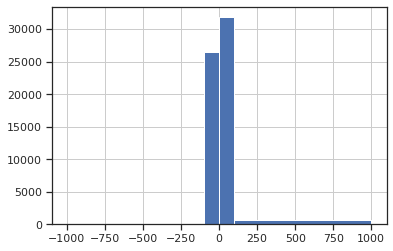

In [76]:
# Visualise distribution of baseFloodElevation
df_Katrina['baseFloodElevation'].hist(bins=[-1000, -100, 0, 100, 1000],facecolor='b')

### Basement Enclosure Crawlspace Type
Basement is defined for purposes of the NFIP as any level or story which has its floor subgrade on all sides.

Basement structure values are as follows:
- 0 - none;
- 1 - Finished Basement/Enclosure;
- 2 - Unfinished Basement/Enclosure;
- 3 - Crawlspace;
- 4 - Subgrade Crawlspace

In [77]:
df_Katrina['basementEnclosureCrawlspace'].value_counts(dropna=False)

NaN    124647
0.0      7064
2.0      2876
1.0      1120
4.0       141
Name: basementEnclosureCrawlspace, dtype: int64

### Condominium Indicator 
This is an indicator of what type of condominium property is being insured. 

Condominium Code - 1 character:
- Not a condominium (N);
- An individual condominium unit owned by a unit owner, or by a condominium association (U);
- The entire condominium building owned by the association insuring building common elements as well as building elements (additions and alterations) within all units in the building, not eligible under Condominium Master Policy (A);
- The entire residential condominium building owned by the association eligible under Condominium Master Policy, insuring the entire condominium building common elements as well as building elements (additions and alterations) within all units in the building, (H) for High-Rise or (L) for Low-Rise; Townhouses (T);

In [78]:
# condominiumIndicator
df_Katrina['condominiumIndicator'].value_counts(dropna=False)

N      134424
L         732
U         440
H         237
A          12
NaN         3
Name: condominiumIndicator, dtype: int64

### Elevated Building Indicator

 Yes (Y) or No (N) indicator of whether or not a building meets the NFIP definition of an elevated building. 
 
 - Yes is indicated with either a 'true' or '1'.
 - No is indicated with either a 'false' or '0'. 
 
An elevated building is a no-basement building that was constructed so as to meet the following criteria: 1. The top of the elevated floor (all A zones) or the bottom of the lowest horizontal structural member of the lowest floor (all V zones) is above ground level. 2. The building is adequately anchored. 3. The method of elevation is pilings, columns (posts and piers), shear walls (not in V zones), or solid foundation perimeter walls (not in V zones)

In [79]:
# Elevated building indicator
df_Katrina['elevatedBuildingIndicator'].value_counts(dropna=False)

0.0    108649
1.0     27199
Name: elevatedBuildingIndicator, dtype: int64

### Elevation Difference

Difference in feet between the elevation of the lowest floor used for rating or the floodproofed elevation and the base flood elevation (BFE), or base flood depth, as appropriate from the elevation certificate.

In [80]:
# Elevation Difference
df_Katrina['elevationDifference'].value_counts(dropna=False)

 NaN     67305
 0.0     24130
 1.0     18935
 2.0     10380
 3.0      4719
         ...  
 85.0        1
-21.0        1
 28.0        1
 93.0        1
 44.0        1
Name: elevationDifference, Length: 73, dtype: int64

### Elevation Certificate Indicator

Indicates if a policy has been rated with elevation certificate.
- 1 - No Elevation Certificate, original effective date prior to October 1, 1982, with no break in insurance coverage or change in insurable interest. Policies will be rated using 'No Base Flood Elevation' +2 to +4 feet rates;
- 2 - No Elevation Certificate, original effective date on or after October 1, 1982, with no break in insurance coverage or change in insurable interest. Policies will be rated using 'No Elevation Certificate' rates;
- 3 - Elevation Certificate with BFE. Policies will be rated using 'With Base Flood Elevation' rates;
- 4 - Elevation Certificate without BFE. Policies will be rated using 'No Base Flood Elevation' rates;

In [81]:
# Elevated building indicator
df_Katrina['elevationCertificateIndicator'].value_counts(dropna=False)

NaN    105750
3.0     18323
1.0     10630
2.0       658
4.0       487
Name: elevationCertificateIndicator, dtype: int64

### House Of Worship

Yes (Y) or No (N) indicator of whether or not a building is reported as being a house of worship in the policy application.
- Yes is indicated with either a 'true' or '1'.
- No is indicated with either a 'false' or '0'

In [82]:
# House of worship
df_Katrina['houseWorship'].value_counts(dropna=False)

0.0    135833
1.0        15
Name: houseWorship, dtype: int64

### Location Of Contents

Code that indicates where within the structure the contents are located.
- 1 - Basement/Enclosure/Crawlspace/Subgrade Crawlspace only;
- 2 - Basement/Enclosure/Crawlspace/Subgrade Crawlspace and above;
- 3 - Lowest floor only above ground level (No basement/enclosure/crawlspace/subgrade crawlspace);
- 4 - Lowest floor above ground level and higher floors (No basement/enclosure/crawlspace/subgrade crawlspace);
- 5 - Above ground level more than one full floor;
- 6 - Manufactured (mobile) home or travel trailer on foundation;

In [83]:
# Location Of Contents
df_Katrina['locationOfContents'].value_counts(dropna=False)

3.0    73833
NaN    36114
4.0    22440
2.0     2451
6.0      611
7.0      244
5.0      154
1.0        1
Name: locationOfContents, dtype: int64

### Amount Paid On Contents Claim
Dollar amount paid on the contents claim. In some instances, a negative amount may appear, which occurs when a check issued to a policy holder isn't cashed and has to be re-issued

In [84]:
# Amount Paid On Contents Claim
df_Katrina['amountPaidOnContentsClaim'].value_counts(dropna=False)

NaN         38326
20000.00     5062
10000.00     4957
30000.00     4654
40000.00     3303
            ...  
55456.85        1
1637.90         1
38088.83        1
2087.98         1
7097.93         1
Name: amountPaidOnContentsClaim, Length: 22630, dtype: int64

### Total Contents Insurance Coverage

Total Insurance Amount in dollars on the Contents

In [85]:
# Total Contents Insurance Coverage
df_Katrina['totalContentsInsuranceCoverage'].value_counts(dropna=False)

0.0         29503
100000.0     8431
20000.0      6295
30000.0      6271
50000.0      5862
            ...  
124600.0        1
188200.0        1
179600.0        1
181100.0        1
206300.0        1
Name: totalContentsInsuranceCoverage, Length: 1275, dtype: int64

### Lowest Adjacent Grade
Lowest natural grade adjacent to the insured structure prior to excavating or filling. The difference in feet of the lowest natural grade adjacent to the building from the reference level of the building

In [86]:
# Lowest Adjacent Grade
df_Katrina['lowestAdjacentGrade'].value_counts(dropna=False)

 NaN      94937
 0.0       3755
-4.5        582
-4.6        580
-4.7        542
          ...  
 179.0        1
 112.0        1
-24.8         1
 44.4         1
 93.9         1
Name: lowestAdjacentGrade, Length: 501, dtype: int64

### Lowest Floor Elevation

A building's lowest floor is the floor or level (including basement/enclosure/crawlspace/subgrade crawlspace) that is used as the point of reference when rating a building. This includes the level to which a building is floodproofed*. The elevation in feet of the reference level of the building from the elevation certificate

In [87]:
# Lowest Floor Elevation
df_Katrina['lowestFloorElevation'].value_counts(dropna=False)

 NaN      76908
-3.0       9723
 0.0       6003
-2.0       5690
 1.0       4944
          ...  
 302.0        1
 153.0        1
 422.0        1
 197.0        1
 32.0         1
Name: lowestFloorElevation, Length: 135, dtype: int64

### Number Of Floors In The Insured Building

Code that indicates the number of floors in the insured building.
- 1 = One floor;
- 2= Two floors;
- 3 = Three or more floors;
- 4 = Split-level;
- 5 = Manufactured (mobile) home or travel trailer on foundation;
- 6 = Townhouse/Rowhouse with three or more floors (RCBAP Low-rise only);

In [88]:
# Number of Floors
df_Katrina['numberOfFloorsInTheInsuredBuilding'].value_counts(dropna=False)

1.0    97128
2.0    32612
3.0     4612
4.0      807
5.0      675
6.0       14
Name: numberOfFloorsInTheInsuredBuilding, dtype: int64

### Obstruction Type

Code that gives the type of obstruction (if any) in the enclosure (if any).

- With obstruction: enclosure/crawlspace with proper openings not used for rating (not applicable in V zones) - **15**;
- With obstruction: less than 300 sq. ft. with breakaway walls, but no machinery or equipment attached to building below lowest elevated floor, or elevation of machinery/equipment is at or above Base Flood Elevation - **20**;
- With obstruction: less than 300 sq. ft. with breakaway walls or finished enclosure and with machinery or equipment attached to building below lowest elevated floor, and elevation of machinery/equipment is below Base Flood Elevation - **24**;
- With obstruction: 300 sq. ft. or more with breakaway walls, but no machinery or equipment attached to building below the Base Flood Elevation - **30**;
- With obstruction: 300 sq. ft. or more with breakaway walls or finished enclosure and with machinery or equipment attached to building below the Base Flood Elevation - **34**;
- With obstruction: no walls, but the elevation of machinery or equipment attached to building is below Base Flood Elevation (NOTE: Use Obstruction Type '10' and Without Obstruction Rate Table if the elevation of machinery/equipment is at or above Base Flood Elevation.) - **40**;
- With obstruction: nonbreakaway walls/crawlspace or finished enclosure with no machinery or equipment attached to building below lowest elevated floor - **50**;
- With obstruction: nonbreakaway walls/crawlspace or finished enclosure with machinery or equipment attached to building below lowest elevated floor - **54**;
- With obstruction - **60**;
- With Certification subgrade crawlspace (AE, A01-A30, unnumbered A, AO, AH, AOB, AHB zones) - **70**;
- Without Certification subgrade crawlspace (all zones) - **80**;
- With Enclosure: Elevated buildings with elevator below the BFE in A zones. No other enclosure below the BFE. - **90**;
- Free of Obstruction: Elevated buildings with lattice, slats, or shutters (including louvers) enclosing the elevator below the BFE in V zones. No other obstruction or machinery and equipment (M&E) servicing the building located below the BFE. The building will be rated free of obstruction with the V zone elevator loading added to the building basic limit. - **91**;
- With Enclosure: Elevated buildings with elevator below the BFE in A zones. Enclosure below the BFE has no proper openings, is finished, or is used for other than parking, building access, or storage. - **92**;
- With Obstruction: Elevated buildings with elevator below the BFE in V zones. No other obstruction or machinery and equipment (M&E) servicing the building located below the BFE. - **94**;
- With Obstruction: Elevated buildings with elevator below the BFE in V zones. Breakaway wall obstruction is unfinished and elevator and obstruction are located below the BFE, but no machinery and equipment (M&E) servicing the building is located below the BFE. - **95**;
- With Obstruction: Elevated buildings with elevator below the BFE in V zones. Breakaway wall obstruction is finished or is used for other than parking, building access, or storage. - **96**;
- With Obstruction: Elevated buildings with elevator below the BFE in V zones. No other obstruction, but has M&E servicing the building located below the BFE. - **97**;
- With Obstruction: Elevated buildings with elevator below the BFE in V zones. Breakaway walls obstruction and M&E servicing the building are located below the BFE. - **98**;

In [89]:
# Obstruction Type
df_Katrina['obstructionType'].value_counts(dropna=False)

NaN     80529
10.0    48665
15.0     2380
50.0     1935
60.0      967
54.0      602
20.0      350
30.0      146
80.0      140
40.0       52
24.0       35
34.0       34
92.0        9
95.0        2
90.0        1
98.0        1
Name: obstructionType, dtype: int64

## Occupancy Type

Code indicating the use and occupancy type of the insured structure. One-digit code:
- 1=single family residence;
- 2 = 2 to 4 unit residential building;
- 3 = residential building with more than 4 units;
- 4 = Non-residential building;

In [90]:
df_Katrina['occupancyType'].value_counts(dropna=False)

1.0    110995
2.0     15359
4.0      5788
3.0      3278
6.0       428
Name: occupancyType, dtype: int64

What stand 6 for?

### Original NB Date

The original date of the flood policy. When time is not specified in the field, it will default to T00:00:00.000Z

In [91]:
df_Katrina['originalNBDate'].value_counts(dropna=False)

1987-11-01T05:00:00.000Z    301
2004-04-30T04:00:00.000Z    269
2004-07-30T04:00:00.000Z    235
2004-06-30T04:00:00.000Z    226
2004-09-30T04:00:00.000Z    211
                           ... 
1992-02-23T05:00:00.000Z      1
1995-12-25T05:00:00.000Z      1
1988-08-05T04:00:00.000Z      1
1985-03-24T05:00:00.000Z      1
2009-01-23T05:00:00.000Z      1
Name: originalNBDate, Length: 7492, dtype: int64

### Original Construction Date
The original date of the construction of the building. When time is not specified in the field, it will default to T00:00:00.000Z

In [92]:
df_Katrina['originalConstructionDate'].value_counts(dropna=False)

1974-07-01T04:00:00.000Z    5580
1970-01-01T05:00:00.000Z    3399
1950-01-01T05:00:00.000Z    2545
1960-01-01T05:00:00.000Z    2330
1975-01-01T05:00:00.000Z    2251
                            ... 
1990-05-31T04:00:00.000Z       1
1983-06-02T04:00:00.000Z       1
1962-03-20T05:00:00.000Z       1
2001-12-28T05:00:00.000Z       1
1968-11-26T05:00:00.000Z       1
Name: originalConstructionDate, Length: 12035, dtype: int64

### Post-FIRM Construction Indicator

Yes or No Indicator on whether construction was started before or after publication of the FIRM. Yes is indicated with either a 'true' or '1'. No is indicated with either a 'false' or '0'. For insurance rating purposes, buildings for which the start of construction or substantial improvement was after December 31, 1974, or on or after the effective date of the initial FIRM for the community, whichever is later, are considered Post-FIRM construction

In [93]:
df_Katrina['postFIRMConstructionIndicator'].value_counts(dropna=False)

0.0    86713
1.0    49135
Name: postFIRMConstructionIndicator, dtype: int64

### Rate Method

 Indicates policy rating method:
 - 1 - Manual;
 - 2 - Specific;
 - 3 - Alternative;
 - 4 - V-Zone Risk Factor Rating Form;
 - 5 - Underinsured Condominium Master Policy;
 - 6 - Provisional;
 - 7 - Preferred Risk Policy (PRPs issued for eligible properties located within a non-Special Flood Hazard Area [non-SFHA]);
 - 8 - Tentative;
 - 9 - MPPP Policy;
 - A - Optional Post-1981 V Zone;
 - B - Pre-FIRM policies with elevation rating - Flood Insurance Manual rate tables;
 - E - FEMA Pre-FIRM Special Rates;
 - F - Leased Federal Property;
 - G - Group Flood Insurance Policy (GFIP);
 - P - Preferred Risk Policy (A PRP renewal issued in the first year following a map revision for an eligible property that was newly mapped into the SFHA by the map revision, or new business written for an eligible property that was newly mapped into the SFHA by a map revision effective on or after October 1, 2008 - PRP Eligibility Extension);
 - Q - Preferred Risk Policy (subsequent PRP renewals where the previous policy year was reported as a 'P' or 'Q');
 - S - FEMA Special Rates;
 - T - Severe Repetitive Loss Properties (formerly Target Group Full Risk). Effective October 1, 2013, code will no longer be valid;
 - W - Pre-FIRM policies with elevation rating - Submit-for-Rate procedures;

In [94]:
# Rate Method
df_Katrina['rateMethod'].value_counts(dropna=False)

1    112647
7     17012
1      4032
2      1428
4       489
9        99
A        93
8        21
7        14
2         8
5         5
Name: rateMethod, dtype: int64